# HW6
### Author: Harsh Tandon

The goal of this HW is to use decision trees to find what made it more or less likely to survive the Titanic sinking in 1912.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


## Cleaning

We will start by cleaning the data set. This part is already done it for you. So, you should just execute the code below.

In [38]:
df = pd.read_csv("titanic.csv")

Get rid of useless attributes

In [39]:
df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

Binarize gender

In [40]:
df['Male'] = df.Sex == 'male'

In [41]:
df.drop(['Sex'], axis=1, inplace=True)

Make dummy variables for port of origin

In [42]:
df = pd.get_dummies(data=df,columns=['Embarked'])

Remove the nulls

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Male          891 non-null bool
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: bool(1), float64(2), int64(4), uint8(3)
memory usage: 45.3 KB


In [44]:
df.isna().any()

Survived      False
Pclass        False
Age            True
SibSp         False
Parch         False
Fare          False
Male          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [45]:
df.Age.isna().sum()

177

In [46]:
len(df)

891

In [47]:
df.dropna(inplace=True)

In [48]:
len(df)

714

In [49]:
len(df) + 177 == 891

True

In [50]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,0,0,1
1,1,1,38.0,1,0,71.2833,False,1,0,0
2,1,3,26.0,0,0,7.9250,False,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,0,1


## Data set description
After cleaning, we have a DataFrame df, which reports the passengers of the Titanic (one row per passenger). The columns are:
<ul>
<li><b>Survived</b>: binary attribute that indicates whether the passenger survived. This is the dependent variable that we will attempt to explain
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The amout of the passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The amout of the passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The ticket fare
<li><b>Male</b>: binary attibute that indicates the gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

### Question 1

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 1</b> (i.e., one root and two leaf nodes) to find the differences between those who survived and those who didn't. (In Camino, pick the answer with the right description)

In [51]:
X = df.drop('Survived',axis=1)
Y = df.Survived

In [52]:
X.head(1)

,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.25,True,0,0,1


In [53]:
dt = tree.DecisionTreeClassifier(max_depth=1)

In [54]:
dt.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

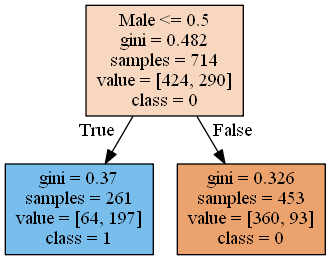

In [55]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Question 2

In **at most 10 words**, explain what the decision tree tells us. Write your answer in a markdown cell. (In Camino, fill the same sentence into the blank)

__Females are more likely to survive than Males.__

### Question 3

Use **one** seaborn command to draw a bar chart to **statistically** validate what you found in the previous question. (In Camino, fill in the program code line you used) 

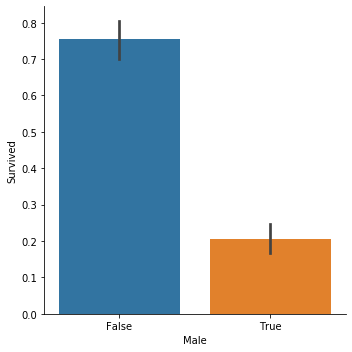

In [56]:
sns.catplot(x='Male', y='Survived', kind='bar', data=df)

### Question 4

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves. (In Camino, pick the 3 attributes/predictors decision tree used to build the tree.)

In [57]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [58]:
dt.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

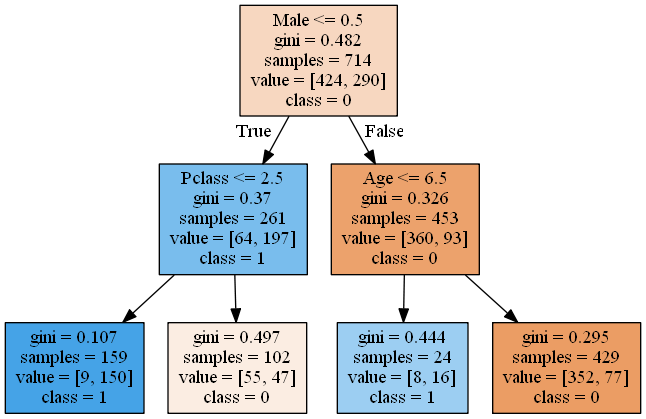

In [59]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Question 5

The tree found in your previous question should involve three predictors. Guided from what the tree tells you, detect an interesting finding involving <b>two</b> of these three predictors and show its validity through seaborn. 
<p><b>Format and grading:</b> For this question, you will be graded on <b>the first two Jupyter cells following this cell</b> (<b>the following cells will be ignored, without exception</b>). The first cell following this cell must be a markdown cell with your finding written in English. The second cell must contain the code that builds a seaborn chart: this chart must <b>statistically</b> validate your finding. 

### Q5.1,  First solution (right side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

__Males are less likely to survive than females; Additionally, if the male is older than 6.5 years, chances of survival are even less likely.__

In [60]:
df2 = df.copy()
df2['binned_age'] = pd.cut(df2.Age, bins=[0,6.5,100])

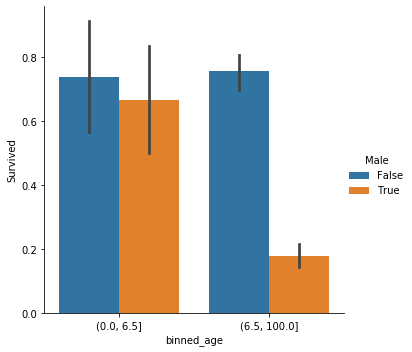

In [61]:
sns.catplot(data=df2, x='binned_age', y='Survived', hue='Male', kind='bar')

### Q5.2, Second solution (left side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

__Females are more likely to survive than Males. Additionally, being in a better class increases their chance of survival. (Lower the value of Pclass the better the class is.)__

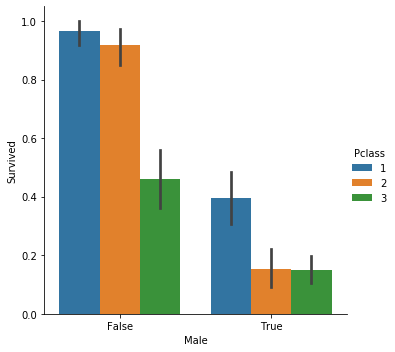

In [62]:
sns.catplot(data=df2,x='Male',y='Survived',hue='Pclass',kind='bar')